In [1]:
%matplotlib widget

Imports

In [2]:
import numpy as np
import umap
from sklearn.cross_decomposition import CCA
from matplotlib import pyplot as plt
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

Generating inputs

In [3]:
distribution = distribution_generator(num_states=2, num_outputs=2)
sigma, x = e_machine(states=[0.5, -0.5], transition_matrix=distribution, n=10000)

Initializing reservoir and generating hidden states

In [4]:
W, v = weight_initialization(n=1)

In [5]:
# initialize reservoir state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [6]:
# append sigma_t to h_t
r = []
for i, h_t in enumerate(h):
    r.append([sigma[i]]+h_t)


In [ ]:
plt.plot(range(100), h[:100], "o")

uMAP

In [8]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean')
embedding = reducer.fit_transform(r)

In [9]:
plt.plot(embedding[:-1], embedding[1:], 'o')

In [10]:
plt.plot(range(len(embedding)), embedding, 'o')

In [11]:
smaller = embedding[:100]

In [12]:
plt.plot(range(len(smaller)), smaller, 'o')


In [13]:
# fig = plt.figure()
 
# # syntax for 3-D projection
# ax = plt.axes(projection ='3d')
 
# # defining axes
# x = sigma[:100]
# y = h[:100]
# z = range(len(x))
# ax.scatter(x, y, z)

# plt.show()

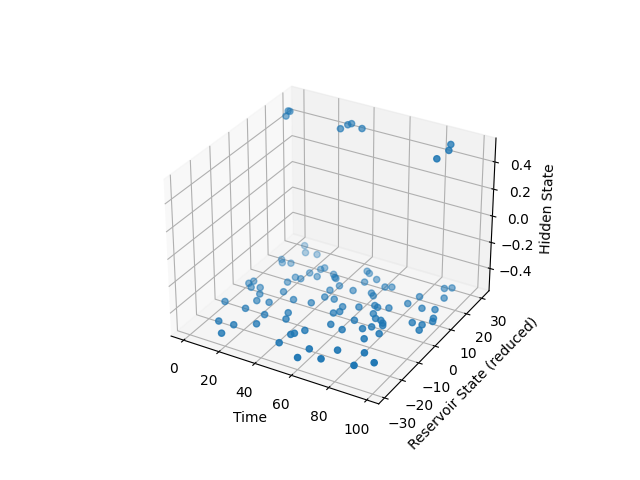

In [27]:
from mpl_toolkits import mplot3d
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining axes
z = sigma[:100]
y = embedding[:100]
ax.set_ylabel("Reservoir State (reduced)")
ax.set_zlabel("Hidden State")
ax.set_xlabel("Time")
ax.scatter(range(len(z)), y, z,)

plt.show()

CCA

In [15]:
# does not work
# cca = CCA(n_components=1)
# output = cca.fit_transform(X=r)

In [16]:
# attempted cca with r_t as X and r_{t+1} as y
cca = CCA(n_components=1)
# two sets of numbers as output
output = cca.fit_transform(X=r[:-1], y = r[1:])

In [17]:
plt.plot(output[0], output[1], 'o')

In [18]:
plt.plot(output[0][:-1], output[0][1:], 'o')

In [19]:
plt.plot(output[1][:-1], output[1][1:], 'o')

In [20]:
# attempt with X=hidden states and y=outputs
cca = CCA(n_components=1)
output_2 = cca.fit_transform(X=r[1:], y = x)
x1 = [i[0] for i in output_2[0].tolist()]
y1 = [i[0] for i in output_2[1].tolist()]
plt.plot(x1, y1, 'o')


In [21]:
plt.plot(x1[:-1], x1[1:], 'o')


In [22]:
plt.plot(y1[:-1], y1[1:], "o")

tSNE

In [23]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=1, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(np.array(r))
plt.plot(X_embedded[:-1], X_embedded[1:], 'o')